In [18]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import joblib
import imodelsx.process_results
import sys
sys.path.append('../experiments/')
results_dir = '../results/'
experiment_filename = '../experiments/01_train_model.py'

# load the results in to a pandas dataframe
r = imodelsx.process_results.get_results_df(results_dir)
cols_varied = imodelsx.process_results.get_experiment_keys(
    r, experiment_filename)
print('experiment varied these params:', cols_varied)
r = imodelsx.process_results.fill_missing_args_with_default(
    r, experiment_filename)

# get the breakdown of data in these groups
r.groupby(cols_varied).size()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 8/8 [00:00<00:00, 500.21it/s]

experiment varied these params: ['seed', 'model_name', 'alpha', 'max_depth']


seed  model_name     alpha  max_depth
1     decision_tree  1.0    2            1
                            3            1
      ridge          0.1    2            1
                     1.0    2            1
2     decision_tree  1.0    2            1
                            3            1
      ridge          0.1    2            1
                     1.0    2            1
dtype: int64

In [19]:
# group using these experiment hyperparams when averaging over random seeds
ravg = imodelsx.process_results.average_over_seeds(
    r, experiment_filename, key_to_average_over='seed'
)

# apply cross validation
ravg_cv = (
    ravg
    .sort_values(by='accuracy_cv', ascending=False)
    .groupby(by=['model_name', 'dataset_name'])
    .first()
    .reset_index()
)
ravg_cv

,model_name,dataset_name,subsample_frac,save_dir,alpha,max_depth,seed,seed_err,use_cache,use_cache_err,accuracy_train,accuracy_train_err,accuracy_cv,accuracy_cv_err,accuracy_test,accuracy_test_err
0,decision_tree,rotten_tomatoes,1,/home/chansingh/cookiecutter-ml-research/results,1.0,3,1.5,0.353553,1.0,0.0,0.569991,0.003526,0.574067,0.007285,0.557223,0.000663
1,ridge,rotten_tomatoes,1,/home/chansingh/cookiecutter-ml-research/results,1.0,2,1.5,0.353553,1.0,0.0,0.998250,0.000247,0.719005,0.003014,0.709193,0.001327


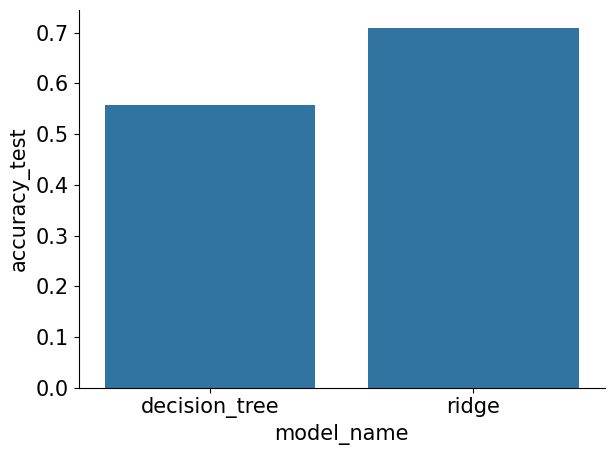

In [20]:
# , hue='dataset_name')
sns.barplot(data=ravg_cv, x='model_name', y='accuracy_test')
plt.show()

Load an individual model

In [21]:
run_args = r.iloc[0]
model = joblib.load(join(run_args.save_dir_unique, 'model.pkl'))
model

RidgeClassifier()